# Task1

In [1]:
#import module
import pandas as pd

In [2]:
#Read datasets
yearly=pd.read_csv(r'D:\technocolabs\yearly_deaths_by_clinic.csv')
#print yearly
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


# Task2
### Calculate proportion of deaths per no. births

In [3]:
yearly['proportion_deaths'] = yearly['deaths']/yearly['births']
#Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly['clinic']=='clinic 1']
yearly2 = yearly[yearly['clinic']=='clinic 2']
#Print out yearly1
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


# Task3
### Plot yearly proportion of deaths at the two clinics

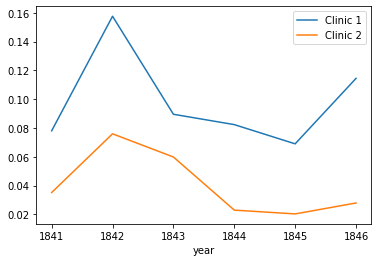

In [4]:
ax = yearly1.plot(x='year',y='proportion_deaths',label='Clinic 1')
yearly2.plot(x='year',y='proportion_deaths', label='Clinic 2', ax=ax)

 Its clear from the plot above that clinic 1 records a higher proportion of deaths at an alarming rate as compared to clinic 2. Something clearly is wrong at clinic1.

# Task4
### Calculate proportion of deaths per no. births

In [5]:
#Read datasets
monthly = pd.read_csv(r'D:\technocolabs\monthly_deaths.csv', parse_dates=['date'])
monthly["proportion_deaths"] = monthly['deaths']/monthly['births']
#Print out the first rows in monthly
monthly.head(10)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
5,1841-06-01,200,10,0.050000
6,1841-07-01,190,16,0.084211
7,1841-08-01,222,3,0.013514
8,1841-09-01,213,4,0.018779
9,1841-10-01,236,26,0.110169


# Task5
### Plot monthly proportion of deaths

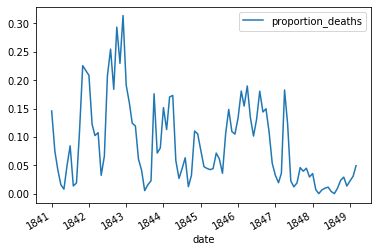

In [6]:
#Plot monthly proportion of deaths
ax = monthly.plot(x='date',y='proportion_deaths')

# Task6
### Split monthly into before and after handwashing_start

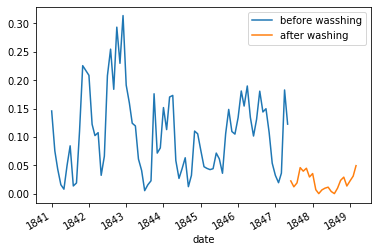

In [7]:
handwashing_start = pd.to_datetime('1847-06-01')
#Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]
#Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date',y='proportion_deaths',label='before wasshing')
after_washing.plot(x='date',y='proportion_deaths', label ='after washing',ax=ax)

The effect of handwashing can be observed form the graph to highlight the drastic change in the rate of proportion deaths. Clearly handwashing has had a huge effect.

# Task7
### Difference in mean monthly proportion of deaths due to handwashing

In [8]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = (after_proportion).mean()-(before_proportion).mean()
mean_diff

-0.0839566075118334

The proportion of deaths was reduced by around 8 percentage points.

# Task8
### A bootstrap analysis of the reduction of deaths due to handwashing

In [9]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac = 1, replace=True)
    boot_after = after_proportion.sample(frac = 1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

#Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])

confidence_interval

0.025   -0.101079
0.975   -0.066534
dtype: float64

The results prove that handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points,
according to a 95% confidence interval.

# Task9
### The data Semmelweis collected points to that:

In [10]:
doctors_should_wash_their_hands = True